In [1]:
import pandas as pd
import numpy as np
import keras as keras

# Estos tienen solo una sola salida. 24x24
df_letras_train = pd.read_csv("DatasetsIAO/Letras/sign_mnist_train.csv")
df_letras_test = pd.read_csv("DatasetsIAO/Letras/sign_mnist_test.csv")

# Estos están en one hot encoding. 64x64
X_numeros = np.load("DatasetsIAO/NumerosBien/X.npy")
Y_numeros = np.load("DatasetsIAO/NumerosBien/Y.npy")

Using TensorFlow backend.
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/fra

1. Cambiar Y numeros a solo tener una salida **DONE**
2. Juntar test y train de letras y separar en Y y X **DONE**
3. Reescalar las imagenes de numeros de 64x64 a 28x28 **DONE**
4. Juntar los datos de numeros y los de letras **DONE**
5. Pasar todo el test a one hot encoding
6. Separar en train y test.

In [2]:
Y_numeros.shape

(2062, 10)

### Transformamos a dataframe el np.array de Numeros

In [3]:
# Para manejar los dataset de los números, los pasamos a dataframe

# Hacemos el reshape de X_numeros para que solo tenga dos dimensiones
# y pueda ser representado en un dataframe.
X_numeros = X_numeros.reshape(2062, 4096)

# Pasamos tanto Y_numeros como X_numeros a dataframe.
X_numeros = pd.DataFrame(data = X_numeros,
          index=np.arange(1, X_numeros.shape[0] + 1),
          columns=np.arange(1, X_numeros.shape[1] + 1))

Y_numeros = pd.DataFrame(data = Y_numeros,
          index=np.arange(1, Y_numeros.shape[0] + 1),
          columns=np.arange(0, Y_numeros.shape[1]))


In [4]:
X_numeros

,1,2,3,4,5,6,7,8,9,10,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
1,0.474510,0.462745,0.450980,0.431373,0.419608,0.403922,0.392157,0.380392,0.372549,0.356863,...,0.419608,0.431373,0.439216,0.454902,0.466667,0.478431,0.486274,0.501961,0.509804,0.521569
2,0.537255,0.517647,0.513726,0.501961,0.486274,0.482353,0.474510,0.470588,0.462745,0.454902,...,0.509804,0.517647,0.529412,0.541176,0.552941,0.564706,0.576471,0.588235,0.600000,0.607843
3,0.435294,0.427451,0.415686,0.411765,0.396078,0.388235,0.376471,0.368627,0.364706,0.352941,...,0.529412,0.541176,0.556863,0.568627,0.580392,0.596078,0.611765,0.619608,0.631373,0.639216
4,0.537255,0.647059,0.647059,0.470588,0.486274,0.486274,0.482353,0.478431,0.474510,0.462745,...,0.392157,0.400000,0.407843,0.423529,0.435294,0.450980,0.466667,0.486274,0.501961,0.521569
5,0.305882,0.298039,0.294118,0.286274,0.278431,0.274510,0.266667,0.266667,0.258824,0.254902,...,0.439216,0.450980,0.450980,0.454902,0.458824,0.466667,0.466667,0.474510,0.478431,0.482353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,0.545098,0.537255,0.525490,0.517647,0.513726,0.501961,0.494118,0.478431,0.462745,0.447059,...,0.564706,0.572549,0.580392,0.588235,0.596078,0.603922,0.607843,0.615686,0.623529,0.627451
2059,0.513726,0.498039,0.490196,0.478431,0.458824,0.450980,0.447059,0.443137,0.431373,0.419608,...,0.427451,0.443137,0.458824,0.470588,0.482353,0.494118,0.501961,0.513726,0.525490,0.529412
2060,0.498039,0.486274,0.470588,0.454902,0.439216,0.427451,0.415686,0.400000,0.388235,0.376471,...,0.537255,0.549020,0.556863,0.564706,0.572549,0.576471,0.580392,0.588235,0.592157,0.619608
2061,0.517647,0.498039,0.486274,0.478431,0.466667,0.450980,0.439216,0.427451,0.407843,0.392157,...,0.454902,0.470588,0.478431,0.486274,0.494118,0.501961,0.513726,0.517647,0.529412,0.537255


### Pasamos de One Hot Encoding a Normal

In [5]:
# Cambiamos las salidas que están en one hot encoding
# Sumamos 26 ya que luego va juntar los dos dataset. El número del 0 al 9 serán los números del 26 al 35
Y_numeros['Clase'] = Y_numeros.apply(lambda row: np.argmax(row.values) + 26, axis = 1)

# Eliminamos las columnas en one hot encoding
Y_numeros = Y_numeros.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], axis = 1)
# Renombramos la clase para poder concatenarla posteriormente.
Y_numeros = Y_numeros.rename(columns={'Clase': 0})
Y_numeros

,0
1,26
2,26
3,26
4,26
5,26
...,...
2058,35
2059,35
2060,35
2061,35


### Concatenación de train y test de letras

In [6]:
# Concatenamos los dataframes de las letras (test y train)
dataframes = [df_letras_train, df_letras_test]

# Ponemos ignore_index para que se vuelva a hacer el index desde cero.
dataset_letras = pd.concat(dataframes, ignore_index = True)
dataset_letras

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34622,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
34623,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
34624,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
34625,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


### Separación de letras en X e Y

In [7]:
# Dividimos el dataset de las letras en Y y X (labels y data)
Y_letras = dataset_letras['label']
#Y_letras = Y_letras.rename(columns={"label": "Clase"})
X_letras = dataset_letras.drop('label', axis=1)

In [8]:
Y_letras

0         3
1         6
2         2
3         2
4        13
         ..
34622     1
34623    12
34624     2
34625     4
34626     2
Name: label, Length: 34627, dtype: int64

### Resize de las imagenes de Numeros a 24x24

In [9]:
imagenesNumeros = X_numeros.to_numpy().reshape(-1, 64, 64)

In [10]:
### import numpy as np
import matplotlib.pyplot as plt
import cv2

newX = []
# Hacemos reshape de todas las imagenes
for img in imagenesNumeros:
    newX.append(cv2.resize(img, dsize=(28, 28), interpolation = cv2.INTER_CUBIC))

# Hacemos reshape de las imágenes de nuevo para poder hacer el dataframe
X_numeros = np.asarray(newX).reshape(-1, 784)

In [11]:
# Volvemos a transformar X_numeros en un dataframe para concatenarlo
X_numeros = pd.DataFrame(data = X_numeros,
          index=np.arange(1, X_numeros.shape[0] + 1),
          columns=np.arange(1, X_numeros.shape[1] + 1))

In [12]:
X_numeros

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
1,0.462483,0.427091,0.394643,0.367774,0.334802,0.309459,0.283324,0.266870,0.254762,0.243226,...,0.915330,0.910911,0.336705,0.365018,0.379212,0.404648,0.430508,0.459204,0.482923,0.512083
2,0.521682,0.503947,0.479864,0.466226,0.445167,0.427047,0.414293,0.402481,0.396001,0.386312,...,0.385031,0.403118,0.424124,0.449125,0.471104,0.493565,0.517385,0.542870,0.573918,0.598595
3,0.422101,0.404080,0.376979,0.359046,0.343373,0.327971,0.313904,0.301414,0.294654,0.286108,...,0.361163,0.388719,0.411652,0.443075,0.483485,0.514085,0.545177,0.570859,0.603719,0.630016
4,0.606778,0.522206,0.520502,0.486466,0.443654,0.398807,0.360236,0.323207,0.291140,0.263414,...,0.355936,0.364150,0.365741,0.370472,0.366925,0.380674,0.399303,0.424715,0.463264,0.510266
5,0.301432,0.284540,0.267425,0.260785,0.251869,0.242710,0.238521,0.232798,0.227677,0.222605,...,0.485074,0.407750,0.416955,0.418422,0.424893,0.430363,0.445277,0.453620,0.462815,0.474009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,0.537683,0.524719,0.496842,0.464701,0.430125,0.397891,0.382709,0.367232,0.345250,0.326970,...,0.732651,0.787059,0.503986,0.513419,0.535482,0.552397,0.571577,0.586922,0.601254,0.621766
2059,0.501940,0.476100,0.440233,0.431496,0.405710,0.375229,0.368060,0.357108,0.364894,0.340131,...,0.644599,0.638204,0.706651,0.650822,0.392736,0.411819,0.446470,0.472040,0.498636,0.521402
2060,0.484550,0.449436,0.420070,0.389372,0.360940,0.335493,0.309546,0.295386,0.273797,0.258636,...,0.396650,0.432131,0.449556,0.466815,0.491682,0.517165,0.543993,0.563221,0.575822,0.594861
2061,0.501560,0.470322,0.438682,0.409586,0.375214,0.349499,0.336483,0.314558,0.294482,0.280245,...,0.647045,0.679229,0.710384,0.733900,0.410592,0.435433,0.462818,0.482912,0.508557,0.523579


In [13]:
# Normalizamos el dataframe de letras, ya que el dataframe de números 
# estaba normalizado y lo vamos a necesitar para entrenar a la red
# de neuronas correctamente.
import pandas as pd
from sklearn import preprocessing

x = X_letras.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# Debemos pasarle el nombre de las nuevas columnas ya que si no
# no se concatenan correctamente.
X_letras = pd.DataFrame(x_scaled, columns=list(range(1,785)))

In [14]:
X_letras

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34622,0.529412,0.466667,0.423529,0.400000,0.411765,0.388235,0.239216,0.403922,0.474510,0.521569,...,0.423529,0.439216,0.454902,0.447059,0.462745,0.705882,0.721569,0.690196,0.654902,0.639216
34623,0.615686,0.623529,0.631373,0.643137,0.650980,0.650980,0.670588,0.682353,0.686275,0.690196,...,0.835294,0.835294,0.835294,0.839216,0.835294,0.827451,0.823529,0.823529,0.819608,0.815686
34624,0.745098,0.749020,0.745098,0.749020,0.745098,0.745098,0.752941,0.752941,0.749020,0.752941,...,0.847059,0.843137,0.835294,0.839216,0.839216,0.835294,0.823529,0.827451,0.819608,0.815686
34625,0.788235,0.803922,0.815686,0.819608,0.839216,0.847059,0.854902,0.874510,0.886275,0.898039,...,0.439216,0.662745,1.000000,1.000000,0.929412,0.443137,0.356863,0.262745,0.274510,0.247059


(34627, 28, 28)


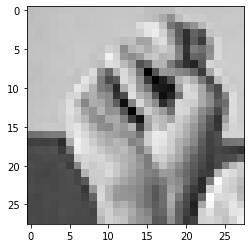

In [15]:
import matplotlib.pyplot as plt
# Hacemos reshape para que pasen de tener una sola dimensión, a tener 2 (de 784 a 28x28).
# Esto es necesario para imprimir la imagen.
prueba2 = X_letras.to_numpy().reshape(-1, 28, 28)
print(prueba2.shape)
plt.imshow(prueba2[1000], cmap="gray")

(2062, 28, 28)


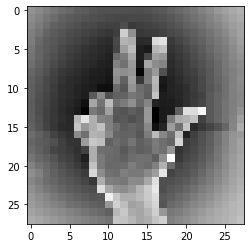

In [16]:
import matplotlib.pyplot as plt
prueba2 = X_numeros.to_numpy().reshape(-1, 28, 28)
print(prueba2.shape)
plt.imshow(prueba2[750], cmap="gray")

## Juntamos los dos dataset y randomizamos las instancias

In [17]:
X_datasetTotal = [X_letras, X_numeros]
Y_datasetTotal = [Y_letras, Y_numeros]

X_datasetTotal = pd.concat(X_datasetTotal, ignore_index = True)
Y_datasetTotal = pd.concat(Y_datasetTotal, ignore_index = True)
Y_datasetTotal = Y_datasetTotal.rename(columns={0: 'Clase'})
Y_datasetTotal

,Clase
0,3
1,6
2,2
3,2
4,13
...,...
36684,35
36685,35
36686,35
36687,35


In [18]:
# Cada vez que se ejecute esta celda, se obtendrá una aleatorización distinta de los datos.

# Concatenamos las columnas para poder manejarlas mejor al hacer shuffle
result = pd.concat([X_datasetTotal, Y_datasetTotal], axis = 1)

from sklearn.utils import shuffle
# Aleatorizamos las imagenes
result = shuffle(result)

# Volvemos a generar los conjuntos X e Y
X_datasetTotal = result.drop('Clase', axis = 1)
Y_datasetTotal = result['Clase']

X_datasetTotal


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
18836,0.803922,0.815686,0.823529,0.835294,0.850980,0.866667,0.874510,0.882353,0.882353,0.886275,...,0.372549,0.356863,0.498039,0.470588,0.458824,0.462745,0.458824,0.462745,0.454902,0.439216
15998,0.349020,0.376471,0.396078,0.407843,0.423529,0.439216,0.443137,0.454902,0.462745,0.466667,...,0.596078,0.600000,0.607843,0.607843,0.611765,0.607843,0.619608,0.623529,0.627451,0.623529
8554,0.815686,0.827451,0.827451,0.835294,0.839216,0.839216,0.843137,0.843137,0.847059,0.850980,...,0.717647,0.725490,0.737255,0.737255,0.678431,0.509804,0.533333,0.584314,0.301961,0.211765
14536,0.494118,0.509804,0.525490,0.533333,0.549020,0.560784,0.572549,0.576471,0.588235,0.600000,...,0.870588,0.874510,0.878431,0.882353,0.882353,0.882353,0.878431,0.882353,0.882353,0.878431
118,0.407843,0.431373,0.466667,0.494118,0.513725,0.529412,0.537255,0.556863,0.576471,0.584314,...,0.341176,0.839216,0.796078,0.796078,0.792157,0.792157,0.788235,0.780392,0.776471,0.772549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25681,0.443137,0.462745,0.478431,0.490196,0.513725,0.541176,0.607843,0.643137,0.670588,0.694118,...,0.647059,0.356863,0.341176,0.250980,0.298039,0.313725,0.305882,0.317647,0.298039,0.301961
26028,0.725490,0.729412,0.737255,0.741176,0.745098,0.749020,0.749020,0.756863,0.756863,0.752941,...,0.850980,0.850980,0.843137,0.843137,0.835294,0.835294,0.835294,0.831373,0.831373,0.827451
25390,0.717647,0.737255,0.737255,0.745098,0.745098,0.749020,0.756863,0.764706,0.768627,0.768627,...,0.062745,0.000000,0.682353,1.000000,0.937255,0.945098,0.949020,0.949020,0.949020,0.949020
21754,0.576471,0.596078,0.619608,0.635294,0.647059,0.658824,0.670588,0.678431,0.690196,0.701961,...,0.596078,0.564706,0.423529,0.815686,0.917647,0.901961,0.905882,0.909804,0.913725,0.917647


## Preparamos las imágenes y las pasamos a One Hot Encoding

In [19]:
# Hacemos el reshape para que las imagenes tengan el tamaño correcto
X_datasetTotal = X_datasetTotal.values.reshape(X_datasetTotal.shape[0], 28, 28, 1)

from keras.utils.np_utils import to_categorical
Y_datasetTotal = to_categorical(Y_datasetTotal.values)

In [20]:
Y_datasetTotal.shape

(36689, 36)

Hay un total de 36 columnas por los siguientes motivos:

- En total, el alfabeto tiene 26 letras. Hay dos que no podemos clasificar: la j y la z. La z no supone un problema ya que se encuentra al final, por lo que directamente no se tiene en cuenta. La j, al estar en el medio, el dataset se salta la etiqueta que debería tener. Esto hace que aun teniendo 24 etiquetas posibles, el array generado al hacer One Hot Encoding, llegue hasta la posición 25.


- Al elegir las nuevas etiquetas de los números, le sumamos 26 debido a que la última etiqueta de las letras es la 25 (por los motivos recién mencionados). Esto hace que 26 + 10 = 36 que es el número de posibles valores que tenemos.

## Separamos en train y test

In [21]:
import math

nInstancias = math.ceil(0.7 * X_datasetTotal.shape[0])

X_train = X_datasetTotal[:nInstancias]
X_test = X_datasetTotal[nInstancias + 1:]

Y_train = Y_datasetTotal[:nInstancias]
Y_test = Y_datasetTotal[nInstancias + 1:]

In [22]:
Y_train.shape

(25683, 36)

## Entrenamiento

In [23]:
from keras import models
from keras import layers

# Modelo de red neuronal
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(36, activation='softmax'))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [24]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, Y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, Y_test, batch_size=32)

from keras import optimizers

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['categorical_crossentropy'])


In [25]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=X_train.shape[0]//32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=X_test.shape[0]//32
    )


Epoch 1/10
119/802 [===>..........................] - ETA: 20s - loss: 3.3830 - categorical_crossentropy: 3.3830

KeyboardInterrupt: 

In [ ]:
model.save("modelo-.h5")

## Cosas antiguas

In [ ]:
# Hacemos el reshape para que las imagenes tengan el tamaño correcto
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


# Pasamos las salidas a one hot encoding. Aunque tenemos 24 clases
# obtenemos un array de 25 posiciones. Esto se debe a que la J (numero
# 9) también se tiene en cuenta, aunque no aparezca en ningún momento.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [ ]:
# import matplotlib.pyplot as plt
# print(X_train.shape)
# plt.imshow(X_train[0][:][:], cmap='gray')
# plt.show()

In [ ]:
# np.save(path_npy + "y_mnist_train.npy", y)
# np.save(path_npy + "X_mnist_train.npy", X)

In [ ]:
print(y_train.shape)
# y = keras.utils.to_categorical(y)
# y

In [ ]:
from keras import models
from keras import layers

# Modelo de red neuronal
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))
          
model.summary()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

from keras import optimizers

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['categorical_crossentropy'])



In [ ]:
import keras

callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='log/',
    )
]

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=X_train.shape[0]//32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=X_test.shape[0]//32,
    callbacks=callbacks
    )

# model.save("modelo.h5")